10th iteration error: 0.21014423579275524
20th iteration error: 0.08186010883430483
30th iteration error: 0.035392660883016715
40th iteration error: 0.018300173022428593
50th iteration error: 0.011778830313631415
60th iteration error: 0.009083925888734619
70th iteration error: 0.007794129583684037
80th iteration error: 0.007038303779544862
90th iteration error: 0.006501325682429548
100th iteration error: 0.006067661199941124
110th iteration error: 0.005693566354034277
120th iteration error: 0.00536125077377033
130th iteration error: 0.005062425548563065
140th iteration error: 0.004792386872156654
150th iteration error: 0.0045478783514015355
160th iteration error: 0.004326309483056159
170th iteration error: 0.0041254617205742
180th iteration error: 0.003943370624601538
190th iteration error: 0.003778272305776882
200th iteration error: 0.003628573974714014


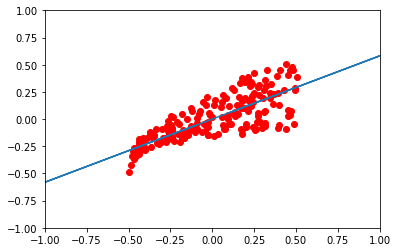

In [100]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read dataset
advertising = pd.read_csv('resources/datasets/advertising.csv')
x = normalize(advertising[['TV','radio','newspaper']].values)
y = normalize(advertising[['sales']].values)

# normalize data
def normalize(data):
    for row in data.T:
        f_mean = np.mean(row)
        f_range = np.amax(row) - np.amin(row)
        
        row -= f_mean
        row /= f_range
    return data

# predict
def predict(x, weights, bias):
    return np.dot(x, weights) + bias
    
# error and calculate cost
def mean_square_error(y_hat, y):
    n = y_hat.shape[0]
    error = (y - y_hat)
    sq_error = np.multiply(error, error)
    return (1 / (2 * n)) * sq_error.sum()

# update weight
def update_parameters(x, y, y_hat, weights, bias, learning_rate=0.05):
    
    n = x.shape[0]
    
    # calculate error
    error = y - y_hat
    
    # calculate derivatives 
    dw = np.dot(-x.T, error) / n
    db = -error.sum() / n
    
    # update w and b
    weights -= dw * learning_rate
    bias -= db * learning_rate

# fit
def train(x, y, iterations=200):
    # initialize weights and bias
    w = np.random.rand(3,1)
    b = np.ones((1,1))

    for n in range(iterations):
        y_hat = predict(x, w, b)
        update_parameters(x, y, y_hat, w, b)
        
        if (n + 1) % 10 == 0:
            print("%ith iteration error: %s" % (n + 1, mean_square_error(y_hat, y)))
    
    return w, b

w, b = train(x, y)

ys = []
xs = []

for i in range(-10, 10):
    if i == 0:
        continue
    xs.append(1/i)
    ys.append(w[0, 0] * (1/i) + b[0, 0])

xs.reverse()
ys.reverse()

plt.plot(x[:,0], y, 'ro')
plt.plot(xs, ys)
plt.axis([-1, 1, -1, 1])
plt.show()
